In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from panoradio_hf.data import IQDataModel
from panoradio_hf.net_utils import get_model_checkpoint_dir
import matplotlib.pyplot as plt
import lightning as pl
import pandas as pd
import numpy as np
import joblib as jl
from panoradio_hf.allconvnet import AllConvNet
import matplotlib as mpl
from panoradio_hf.net_utils import evaluate_model_predictions
import seaborn as sns
import os
%matplotlib inline

In [4]:
from panoradio_hf.net_utils import get_model_checkpoint_dir
from panoradio_hf.net_utils import initialize_pl_trainer

In [5]:
train_model = False

if train_model:

    iqdata = IQDataModel()
    model = AllConvNet()

    callbacks, mlf_logger = initialize_pl_trainer("all-conv-net")
    
    trainer = pl.Trainer(callbacks=callbacks,
                         max_epochs=100,
                         logger=mlf_logger)
    trainer.fit(model, iqdata)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/mspcvsp/anaconda3/envs/algdev/lib/python3.9/site-packages/lightning/pytorch/callbacks/model_checkpoint.py:654: Checkpoint directory /home/mspcvsp/ModelCheckpoints/panorado_hf/all-conv-net exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name           | Type               | Params | Mode 
---------------------------------------------------------------
0  | loss           | CrossEntropyLoss   | 0      | train
1  | train_accuracy | MulticlassAccuracy | 0      | train
2  | val_accuracy   | MulticlassAccuracy | 0      | train
3  | test_accuracy  | MulticlassAccuracy | 0      | train
4  | conv1          | Sequential         | 25.5 K | train
5  | conv2          | Sequential         | 124 K  | train
6  | drop1          | Dropout1d          | 0      | train
7  | conv3          | Sequential         | 493 K  | train
8  | drop2          | Dropout1d     

Sanity Checking: |                                                         | 0/? [00:00<?, ?it/s]

Training: |                                                                | 0/? [00:00<?, ?it/s]

Validation: |                                                              | 0/? [00:00<?, ?it/s]

Validation: |                                                              | 0/? [00:00<?, ?it/s]

Validation: |                                                              | 0/? [00:00<?, ?it/s]

Validation: |                                                              | 0/? [00:00<?, ?it/s]

Validation: |                                                              | 0/? [00:00<?, ?it/s]

Validation: |                                                              | 0/? [00:00<?, ?it/s]

Validation: |                                                              | 0/? [00:00<?, ?it/s]

Validation: |                                                              | 0/? [00:00<?, ?it/s]

Validation: |                                                              | 0/? [00:00<?, ?it/s]

Validation: |                                                              | 0/? [00:00<?, ?it/s]

Validation: |                                                              | 0/? [00:00<?, ?it/s]

Validation: |                                                              | 0/? [00:00<?, ?it/s]

Validation: |                                                              | 0/? [00:00<?, ?it/s]

In [5]:
model_checkpoint = 'epoch=12-val_loss=0.00-other_metric=0.00.ckpt'

model_checkpoint_pth =\
    get_model_checkpoint_dir("all-conv-net").joinpath(model_checkpoint)

model = AllConvNet.load_from_checkpoint(model_checkpoint_pth)
trainer = pl.Trainer()
predictions = trainer.predict(model,
                              datamodule=IQDataModel())

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |                                                                          | 0/? [00:00<?, ?it/s]

In [6]:
from panoradio_hf.net_utils import parse_snrid

Text(0.5, 0, 'SNR [dB]')

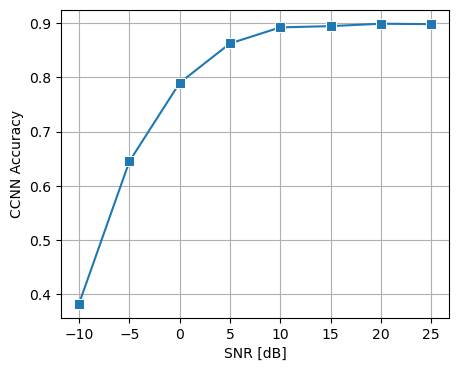

In [7]:
snrid_clf_report, snrid_conf_mat =\
    evaluate_model_predictions(predictions)

allcnet_snrid_acc =\
    pd.Series({key: snrid_clf_report[key]["accuracy"]
               for key in snrid_clf_report})

allcnet_snrid_acc = pd.DataFrame(allcnet_snrid_acc)
allcnet_snrid_acc.reset_index(inplace=True)

allcnet_snrid_acc.rename(columns={0: "ccnn",
                                  "index": "snrid"},
                         inplace=True)

allcnet_snrid_acc["snr"] =\
    allcnet_snrid_acc["snrid"].apply(lambda elem: parse_snrid(elem))

h_ax = plt.figure(figsize=(5, 4)).gca()
sns.lineplot(allcnet_snrid_acc,
             x="snr",
             y="ccnn",
             marker="s",
             markersize=7,
             ax=h_ax)
h_ax.grid(True)
h_ax.set_ylabel("CCNN Accuracy")
h_ax.set_xlabel("SNR [dB]")